In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.rcParams['agg.path.chunksize'] = 100000
import sklearn
from scipy import stats
import datetime
from datetime import datetime
from datetime import timedelta
from datetime import date 
#from isoweek import Week
import math
import matplotlib as mpl
import os
import keyring
from sqlalchemy import create_engine
from sqlalchemy import text
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm
import psycopg2
plt.style.use('~/.matplotlib/stylelib/STV.mplstyle')

In [3]:
fleet = pd.read_csv('UK_fleet_landings.csv')

In [4]:
fleet.head()

,year,month,port_of_landing,port_nationality,vessel_nationality,length_group,gear_category,species_code,species_name,species,species_group,live_weight,landed_weight,value_gbp
0,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,BSS,Bass,Bass,Demersal,0.005,0.005,27.6
1,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,COD,Cod,Cod,Demersal,0.001,0.001,3.3
2,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.028,0.028,56.0
3,2015,1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.020,0.020,88.1
4,2015,1,Aberdeen,UK - Scotland,UK - Scotland,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.958,0.958,1279.8


In [5]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672256 entries, 0 to 672255
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                672256 non-null  int64  
 1   month               672256 non-null  int64  
 2   port_of_landing     672256 non-null  object 
 3   port_nationality    672256 non-null  object 
 4   vessel_nationality  672256 non-null  object 
 5   length_group        672256 non-null  object 
 6   gear_category       672256 non-null  object 
 7   species_code        672256 non-null  object 
 8   species_name        672256 non-null  object 
 9   species             672256 non-null  object 
 10  species_group       672239 non-null  object 
 11  live_weight         672256 non-null  float64
 12  landed_weight       672256 non-null  float64
 13  value_gbp           672256 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 71.8+ MB


In [7]:
#removing null values

fleet = fleet.dropna()

In [8]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672239 entries, 0 to 672255
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                672239 non-null  int64  
 1   month               672239 non-null  int64  
 2   port_of_landing     672239 non-null  object 
 3   port_nationality    672239 non-null  object 
 4   vessel_nationality  672239 non-null  object 
 5   length_group        672239 non-null  object 
 6   gear_category       672239 non-null  object 
 7   species_code        672239 non-null  object 
 8   species_name        672239 non-null  object 
 9   species             672239 non-null  object 
 10  species_group       672239 non-null  object 
 11  live_weight         672239 non-null  float64
 12  landed_weight       672239 non-null  float64
 13  value_gbp           672239 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 76.9+ MB


In [15]:
#creating month and year date column

fleet['month_year'] = fleet['month'].astype(str) + '-' + fleet['year'].astype(str)
fleet = fleet.drop(['year','month'], axis=1)
fleet.head()

,port_of_landing,port_nationality,vessel_nationality,length_group,gear_category,species_code,species_name,species,species_group,live_weight,landed_weight,value_gbp,month_year
0,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,BSS,Bass,Bass,Demersal,0.005,0.005,27.6,1-2015
1,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,COD,Cod,Cod,Demersal,0.001,0.001,3.3,1-2015
2,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.028,0.028,56.0,1-2015
3,Aberdaran,UK - Wales,UK - Wales,10m and under,Pots and traps,LBE,Lobsters,Lobsters,Shellfish,0.020,0.020,88.1,1-2015
4,Aberdeen,UK - Scotland,UK - Scotland,10m and under,Pots and traps,CRE,Crabs (C.P.Mixed Sexes),Crabs,Shellfish,0.958,0.958,1279.8,1-2015


<AxesSubplot:>

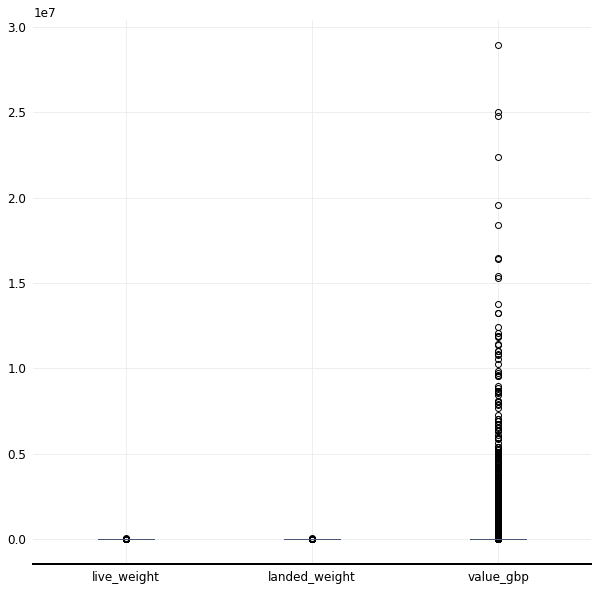

In [19]:
fleet.boxplot(column=['live_weight','landed_weight','value_gbp'])